# Kickstarter Project Success Evaluation- A Classification Model Example

## Section A: Data Preprocessing

### Step 1: Import relevant libraries:

In [1]:
# Standard libraries for data preprocessing
import random, os, timeit
import warnings, re
# warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
# Standard Libraries for data processing and plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Data preprocessing modules
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

In [4]:
# Modules for Model Selection from sklearn
from sklearn import model_selection
## Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [5]:
# Modules for Model Evaluation & Improvement from sklearn   
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import fbeta_score, make_scorer, log_loss, f1_score
from sklearn.metrics import auc, roc_auc_score, roc_curve, average_precision_score
from sklearn.metrics import classification_report, precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import cross_val_score, learning_curve, cross_val_predict
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import KFold
from sklearn import feature_selection

In [6]:
#Standard libraries for data visualization:
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
import scikitplot as skplt
#pd.options.display.max_columns = None
#sns.set_style('darkgrid')

### Step 2: Set up/check the current working directory:

In [7]:
# Print the current working directory
print(os.listdir())

['.DS_Store', 'ks-projects-201801.csv', 'Kickstarter_Success_Evalution.ipynb', '.ipynb_checkpoints']


### Step 3: Import/Read the dataset:

The Kickstarters Projects dataset was downloaded from the following link: https://www.kaggle.com/kemical/kickstarter-projects

In [8]:
### Read the dataset and review
dataset = pd.read_csv('ks-projects-201801.csv')
# Due to limited computational power, consider only the initial 20000 rows of the dataset 
dataset = dataset.iloc[0:20000,:]

# Check columns names
dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

### Step 4: Evaluate data structure: 

In [9]:
dataset.head()   # Read the first five rows of the dataset

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usdpledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [10]:
# Check the columns of the dataset
dataset.columns  

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usdpledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [11]:
# Look at the summary of numerical columns
dataset.describe()

,ID,goal,pledged,backers,usdpledged,usd_pledged_real,usd_goal_real
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.00000,1.978400e+04,2.000000e+04,2.000000e+04
mean,9.543529e+08,3.743562e+04,1.021279e+04,104.82380,7.269650e+03,9.657101e+03,3.298461e+04
std,2.890876e+08,4.831207e+05,1.083815e+05,875.55497,8.885928e+04,1.060433e+05,3.802568e+05
min,1.061440e+05,1.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,7.500000e-01
25%,1.017217e+09,2.000000e+03,3.200000e+01,2.00000,2.000000e+01,3.287500e+01,2.000000e+03
50%,1.044776e+09,5.000000e+03,6.200000e+02,12.00000,4.000000e+02,6.185700e+02,5.252090e+03
75%,1.072536e+09,1.600000e+04,4.056250e+03,55.00000,3.035000e+03,4.013250e+03,1.550000e+04
max,1.101580e+09,4.000000e+07,8.596475e+06,64867.00000,8.596475e+06,8.596475e+06,3.300000e+07


In [12]:
# Check missing data - It looks like there are some missing data in the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                20000 non-null  int64  
 1   name              20000 non-null  object 
 2   category          20000 non-null  object 
 3   main_category     20000 non-null  object 
 4   currency          20000 non-null  object 
 5   deadline          20000 non-null  object 
 6   goal              20000 non-null  float64
 7   launched          20000 non-null  object 
 8   pledged           20000 non-null  float64
 9   state             20000 non-null  object 
 10  backers           20000 non-null  int64  
 11  country           20000 non-null  object 
 12  usdpledged        19784 non-null  float64
 13  usd_pledged_real  20000 non-null  float64
 14  usd_goal_real     20000 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 2.3+ MB


In [13]:
# Check the number of rows and columns of the dataset
print('Number of rows = %2.0i' %dataset.shape[0])
print('Number of columns = %2.0i' %dataset.shape[1])

Number of rows = 20000
Number of columns = 15


### Step 5: Remove unnecessary columns

Remove the columns that are not needed or not useful for the analysis. 'name' and 'currency' columns will not be used. The goal and pledged amount of the projects were converted to usd and named as 'usd_pledged_real' and 'usd_goal_real'. Therefore, these columns will be used in the analysis and 'goal', 'pledged' and 'usdpledged' columns will be removed. 

In [14]:
cols_to_remove = ['name','currency', 'goal','pledged','usdpledged']
data_rmv = dataset[cols_to_remove]
dataset.drop(columns=cols_to_remove,inplace=True)
print('The following columns were removed from the dataset', cols_to_remove)

The following columns were removed from the dataset ['name', 'currency', 'goal', 'pledged', 'usdpledged']


### Step 6: Perform necessary file conversion and feature engineering

In [15]:
# Compute the duration of each project campaign and save it as a new column ('duration')
dataset['launched'] = pd.to_datetime(dataset['launched'])
dataset['deadline'] = pd.to_datetime(dataset['deadline'])
dataset['duration'] = (dataset['deadline'] - dataset['launched']).astype('timedelta64[D]')

# Remove 'launced' and 'deadline' columns
col_rem = ['launched','deadline']
dataset.drop(columns=col_rem,inplace=True)
print('The following columns were removed from the dataset', col_rem)

# Computed pledged ratio - Representing the ratio of pledged money relative to the goal.
dataset['pledge_rate'] = dataset['usd_pledged_real']/dataset['usd_goal_real']
#dataset.drop(columns=['usd_pledged_real','usd_goal_real'],inplace=True)

The following columns were removed from the dataset ['launched', 'deadline']


In [16]:
# Check the dataset again
dataset.head()

,ID,category,main_category,state,backers,country,usd_pledged_real,usd_goal_real,duration,pledge_rate
0,1000002330,Poetry,Publishing,failed,0,GB,0.0,1533.95,58.0,0.000000
1,1000003930,Narrative Film,Film & Video,failed,15,US,2421.0,30000.00,59.0,0.080700
2,1000004038,Narrative Film,Film & Video,failed,3,US,220.0,45000.00,44.0,0.004889
3,1000007540,Music,Music,failed,1,US,1.0,5000.00,29.0,0.000200
4,1000011046,Film & Video,Film & Video,canceled,14,US,1283.0,19500.00,55.0,0.065795


### Step 7: Identify columns: Numerical and Categorical

In [17]:
# Specify ID column
cols_id = ['ID']
cols_cat=[]

# Identify categorical columns
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        cols_cat.append(col)
print('{} columns are categorical.'.format(len(cols_cat)))
print('List of columns categorical: ',  cols_cat)

# Define/update categorical columns
cols_cat=cols_cat

4 columns are categorical.
List of columns categorical:  ['category', 'main_category', 'state', 'country']


In [18]:
# Identify numerical columns
cols_num=[]
for col in dataset.columns:
    if dataset[col].dtype != 'object':
        cols_num.append(col)
print('{} columns were numeric.'.format(len(cols_num)))
print('List of columns numeric: ',  cols_num)

# Define/update numerical columns
cols_num=cols_num

6 columns were numeric.
List of columns numeric:  ['ID', 'backers', 'usd_pledged_real', 'usd_goal_real', 'duration', 'pledge_rate']


In [19]:
# Determine categorical columns with unique values <= 2
col_bincat =[]
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            col_bincat.append(col)

print('{} categorical columns were unique values of 2 or less'.format(len(col_bincat)))
print('List of columns : ',  col_bincat)

0 categorical columns were unique values of 2 or less
List of columns :  []


In [20]:
# Determine categorical columns with unique values > 2
col_mulcat =[]
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) > 2:
            col_mulcat.append(col)
            print('Number of unique variables in column {:3} = {:3}'.format(col, dataset[col].nunique()))

print('{} categorical columns were unique values more than 2'.format(len(col_mulcat)))
print('List of columns: ',  col_mulcat)

Number of unique variables in column category = 157
Number of unique variables in column main_category =  15
Number of unique variables in column state =   6
Number of unique variables in column country =  23
4 categorical columns were unique values more than 2
List of columns:  ['category', 'main_category', 'state', 'country']


### Step 8: Check the variation of the target variable. It is important to check any imbalance issues. 

In [21]:
target_col = 'state'

# Checking target variable - Whether tha data is balanced or unbalanced
dataset['state'].value_counts()

failed        10446
successful     7116
canceled       1987
undefined       199
live            162
suspended        90
Name: state, dtype: int64

In [22]:
# Dropping projects that are live 
dataset = dataset[dataset['state']!='live']

# Assuming projects with state successful as "1" and rest of them as "0"
dataset['state'] = dataset['state'].map(lambda x: 1 if x== 'successful' else 0)

In [23]:
dataset["state"].value_counts()

0    12722
1     7116
Name: state, dtype: int64

### Step 9: Handle missing data: 
If there is missing data, use an appropriate approach to fill missing values.

In [24]:
dataset.isna().any()

ID                  False
category            False
main_category       False
state               False
backers             False
country             False
usd_pledged_real    False
usd_goal_real       False
duration            False
pledge_rate         False
dtype: bool

### Step 9.1: Fill missing values with the average value: 

In [25]:
# Filling missing values with the average value of the column
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
     if col in na_cols:
        print('Column {} has missing values'.format(col))    
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

### Step 9.2: Recheck missing values: 

In [26]:
dataset.isna().any()

ID                  False
category            False
main_category       False
state               False
backers             False
country             False
usd_pledged_real    False
usd_goal_real       False
duration            False
pledge_rate         False
dtype: bool

# Section B: Data Evaluation
## Step 10: Exploratory Data Analysis: 
Visualize numeric and categorical variables to characterize patterns in the dataset 

### Step 10.1: Analyze distribution of target variable

<ipython-input-27-ab9dbbc2e84b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_rate["target_label"] = np.where((target_rate[ref_col] == 0), "No", "Yes")


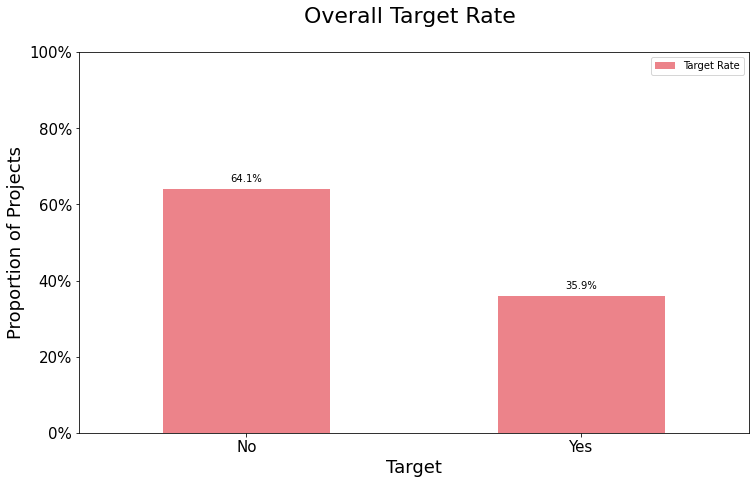

In [27]:
id_col='ID' # Select the identification column
ref_col='state'    # Select the target column

# Compute target ratio
target_rate = dataset[[ref_col, id_col]]
target_rate["target_label"] = np.where((target_rate[ref_col] == 0), "No", "Yes")
target_ratio = target_rate.groupby ("target_label")
target_rate = pd.DataFrame(target_ratio[id_col].count())
target_rate ["Target Rate"] = (target_rate [id_col]/ sum(target_rate [id_col]) )*100

# Plotting
ax =  target_rate[["Target Rate"]].plot.bar(title = 'Overall Target Rate',
                                          legend =True, table = False,grid = False,  
                                          subplots = False, figsize =(12, 7), color = '#ec838a', 
                                          fontsize = 15, stacked=False, ylim =(0,100))
plt.ylabel('Proportion of Projects',horizontalalignment="center",fontstyle = "normal", 
           fontsize = "18", fontfamily = "sans-serif")
plt.xlabel('Target',horizontalalignment="center",fontstyle = "normal", 
           fontsize = "18", fontfamily = "sans-serif")
plt.title('Overall Target Rate \n',horizontalalignment="center", fontstyle = "normal", 
          fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
        ax.annotate(label, (x_value, y_value),xytext=(0, space), textcoords="offset points", ha='center',va=va)
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

###  Step 10.2: Analyze distribution of categorical variables

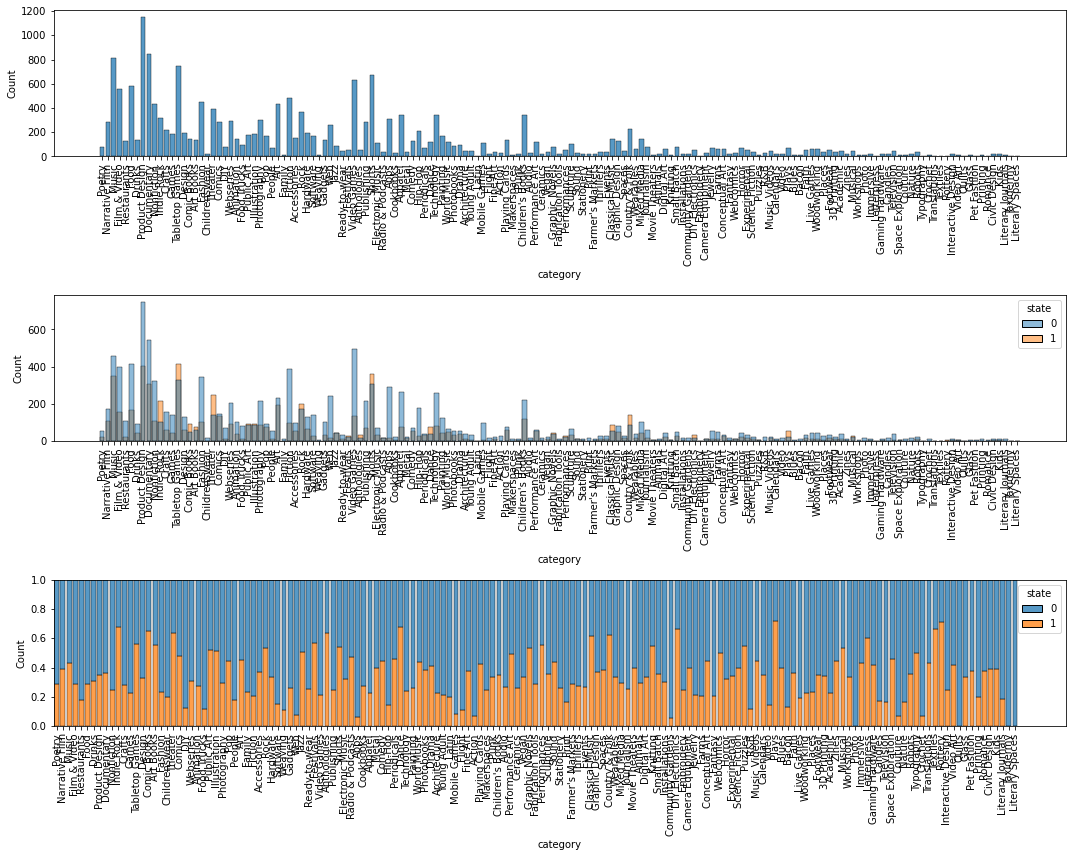

In [28]:
def plot_categorical(ds,cat_cols,ref_col,rowcol):
    fig, ax = plt.subplots(nrows = rowcol[0],ncols = rowcol[1],figsize = (15,12))
    i=1
    for col in cols_vars:
        binnum = min(20,len(list(ds[col].unique())))
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col,shrink=0.8, bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, multiple='fill', bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        
cols_vars= ['category']
ref_col='state'
rowcolumn = [3,1]
plot_categorical(dataset,cols_vars,ref_col,rowcolumn)
plt.tight_layout()

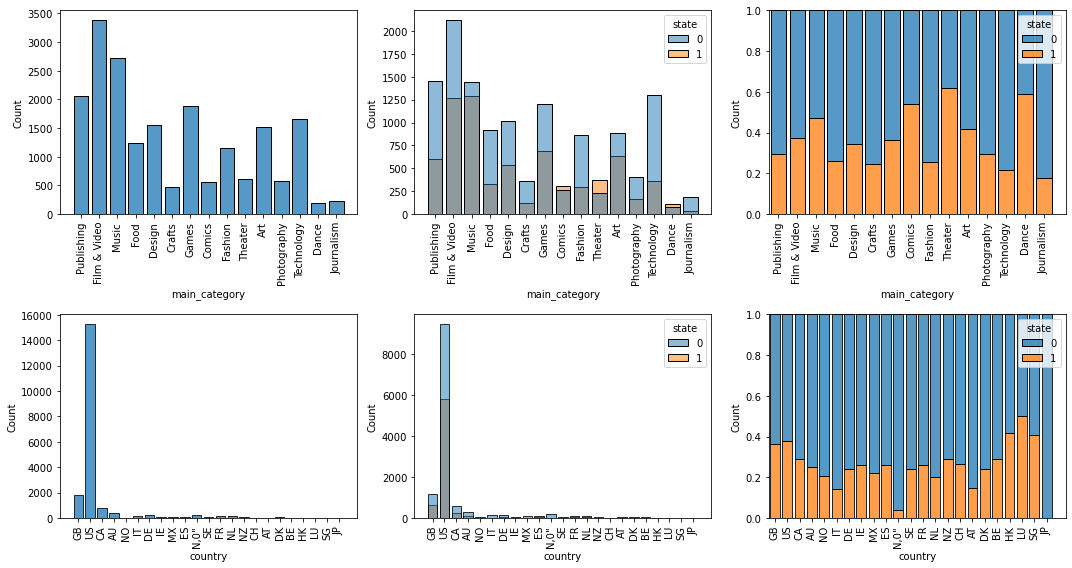

In [29]:
def plot_categorical(ds,cat_cols,ref_col,rowcol):
    fig, ax = plt.subplots(nrows = rowcol[0],ncols = rowcol[1],figsize = (15,8))
    i=1
    for col in cols_vars:
        binnum = min(20,len(list(ds[col].unique())))
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col,shrink=0.8, bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, bins=binnum)
        plt.xticks(rotation=90)
        i=i+1
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, multiple='fill', bins=binnum)
        plt.xticks(rotation=90,fontsize = "10")
        i=i+1
        
cols_vars= ['main_category','country']
ref_col='state'
rowcolumn = [2,3]
plot_categorical(dataset,cols_vars,ref_col,rowcolumn)
plt.tight_layout()

###  Step 10.3: Analyze distribution of numerical variables

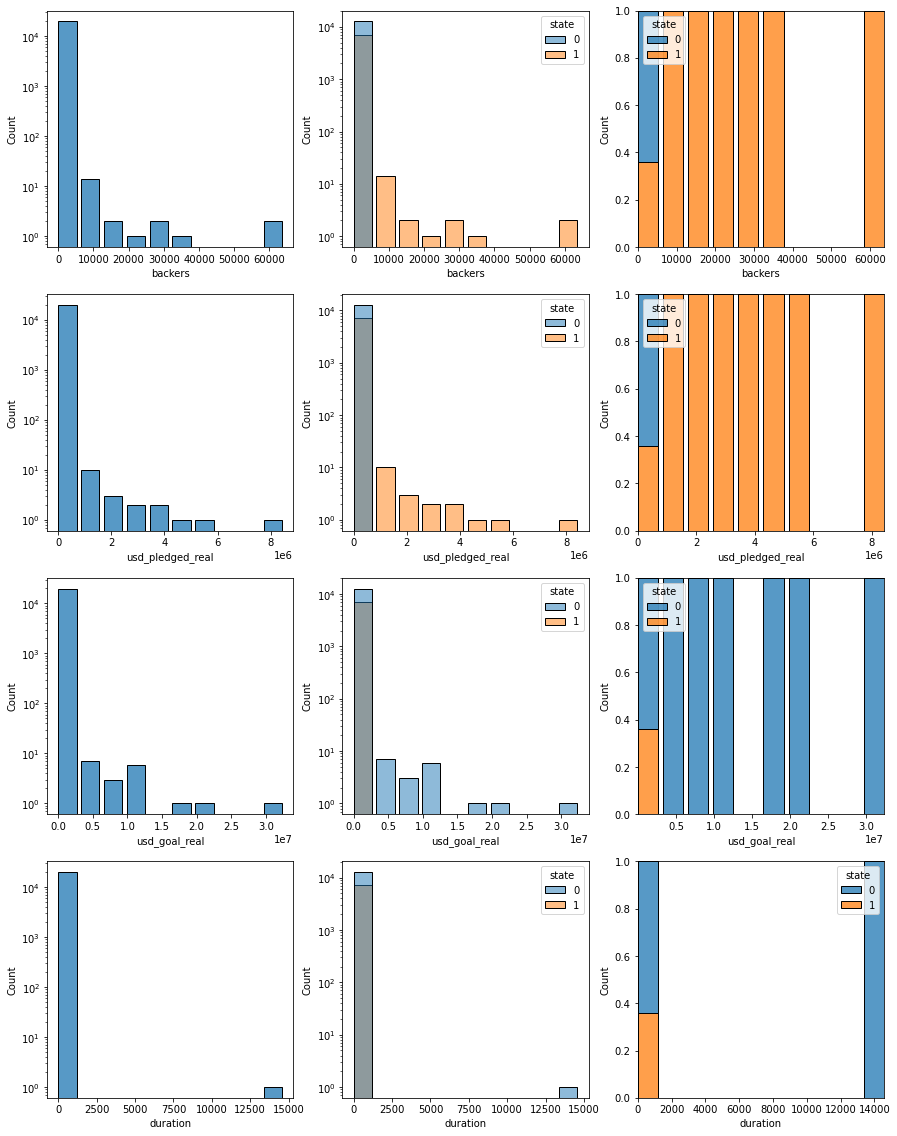

In [30]:
def plot_numerical(ds,cat_cols,ref_col,rowcol):
    fig, ax = plt.subplots(nrows = rowcol[0],ncols = rowcol[1],figsize = (15,20))
    i=1
    for col in cols_vars:
        binnum = min(10,len(list(ds[col].unique())))
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col,shrink=0.8, bins=binnum)
        plt.yscale('log')
        i=i+1        
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, bins=binnum)
        plt.yscale('log')
        i=i+1
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, multiple='fill', bins=binnum)
        i=i+1

cols_vars= ['backers', 'usd_pledged_real', 'usd_goal_real', 'duration']
ref_col='state'
rowcolumn = [len(cols_vars),3]
plot_numerical(dataset,cols_vars,ref_col,rowcolumn)

###  Step 10.4: Remove outliers based on EDA

In [31]:
# Remove outlier data based on the evaluation of variable distributions
print('Number of rows before filtering = %2.0i' %dataset.shape[0])

duration_limit = 1000
# Remove data with duration more than duration limit
dataset=dataset[dataset.duration < duration_limit ]

usd_pledged_read_limit = 1000000  # (1E6)
# Remove data with usd_pledged_read more than usd_pledged_read_limit 
dataset=dataset[dataset.usd_pledged_real < usd_pledged_read_limit ]

usd_goal_real_limit = 3000000 # (3E6)
# Remove data with usd_goal_real more than usd_goal_real_limit
dataset=dataset[dataset.usd_goal_real < 3000000]

print('Number of rows after filtering = %2.0i' %dataset.shape[0])

Number of rows before filtering = 19838
Number of rows after filtering = 19796


###  Step 10.5: Reanalyze distribution of numerical variables after filtering

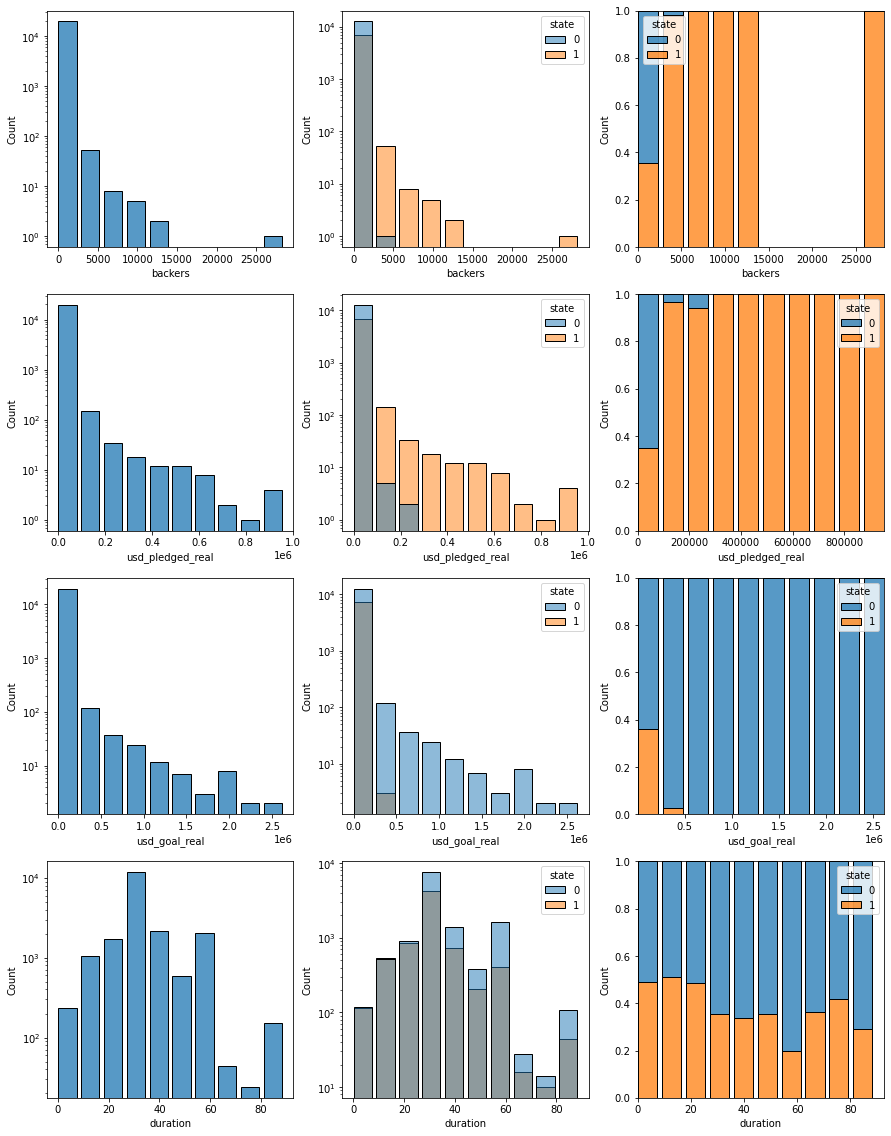

In [32]:
def plot_numerical(ds,cat_cols,ref_col,rowcol):
    fig, ax = plt.subplots(nrows = rowcol[0],ncols = rowcol[1],figsize = (15,20))
    i=1
    for col in cols_vars:
        binnum = min(10,len(list(ds[col].unique())))
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col,shrink=0.8, bins=binnum)
        plt.yscale('log')
        i=i+1        
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, bins=binnum)
        plt.yscale('log')
        i=i+1
        
        plt.subplot(rowcol[0],rowcol[1],i)
        sns.histplot(ds,x = col, hue = ref_col,shrink=0.8, multiple='fill', bins=binnum)
        i=i+1

cols_vars= ['backers', 'usd_pledged_real', 'usd_goal_real', 'duration']
ref_col='state'
rowcolumn = [len(cols_vars),3]
plot_numerical(dataset,cols_vars,ref_col,rowcolumn)

###  Step 11.1: Correlation between variables

In [33]:
# Check correlations:

# Select the columns for correlation calculation
dataset2 = dataset[[ 'backers','usd_pledged_real', 'usd_goal_real','pledge_rate','duration']]

correlations = dataset2.corrwith(dataset['state'])
correlations = correlations[correlations!=1]

positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

print('\nMost Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)


Most Positive Correlations: 
 usd_pledged_real    0.234921
backers             0.227710
pledge_rate         0.025316
dtype: float64

Most Negative Correlations: 
 usd_goal_real   -0.113704
duration        -0.128808
dtype: float64


### Step 11.2: Plot variable correlations:

Text(0.5, 1.0, 'Correlation with Target \n')

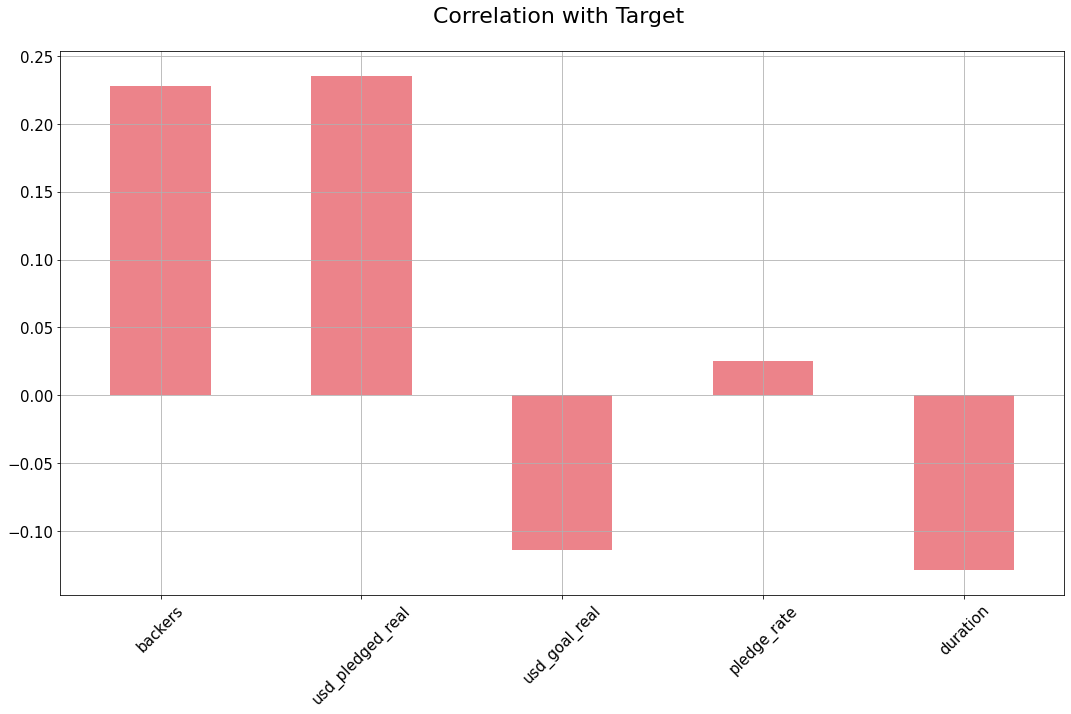

In [34]:
correlations = dataset2.corrwith(dataset['state'])

correlations = correlations[correlations!=1]
correlations.plot.bar(figsize = (18, 10), fontsize = 15, 
                      color = '#ec838a',rot = 45, grid = True)

plt.title('Correlation with Target \n',horizontalalignment="center", fontstyle = "normal", 
          fontsize = "22", fontfamily = "sans-serif")

### Step 11.2: Plot Correlation Matrix of all independent variables: 
'backers' and 'usd_pledged_real' columsn are correlated.

<AxesSubplot:>

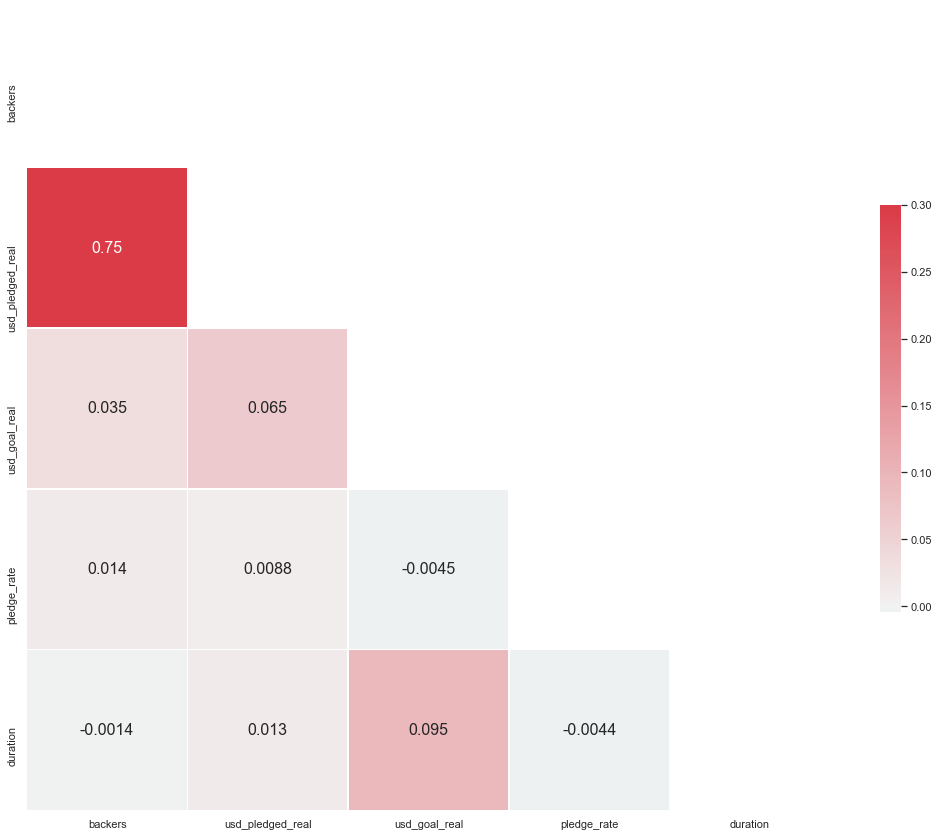

In [35]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = dataset2.corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, annot_kws = {'fontsize': 16})

### Step 11.3: Compute p-value and chi-square of the columns
p-values are relatively low.

In [36]:
# Compute p-value and chi-square of the columns
corr_col_list = ['category', 'main_category', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real','pledge_rate']

chi2_array, p_array = [], []
for column in corr_col_list :
    
    crosstab = pd.crosstab(dataset[column], dataset['state'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({'Variable': corr_col_list , 
                       'Chi-square': chi2_array, 
                       'p-value': p_array})
df_chi.sort_values(by = 'p-value', ascending = False)

,Variable,Chi-square,p-value
5,usd_goal_real,5665.170646,2.008505e-07
3,country,269.770052,1.560384e-44
1,main_category,850.517036,1.711254e-172
0,category,1886.991237,1.496386e-294
6,pledge_rate,19680.826524,4.824747e-312
2,backers,10526.751386,0.000000e+00
4,usd_pledged_real,16629.247193,0.000000e+00


### Step 11.4: Check Multicollinearity using VIF: 
Multicollinearity check using Variable Inflation Factors (VIF). Unlike Correlation matrix, VIF determines the strength of the correlation of a variable with a group of other independent variables in a dataset. VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

In [37]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

dataset2 = dataset[['backers','usd_pledged_real', 'usd_goal_real','pledge_rate']]

calc_vif(dataset2)

,variables,VIF
0,backers,2.395532
1,usd_pledged_real,2.409701
2,usd_goal_real,1.013125
3,pledge_rate,1.000312


Check variables with high VIF

Text(0.5, 1.0, 'Collinearity \n')

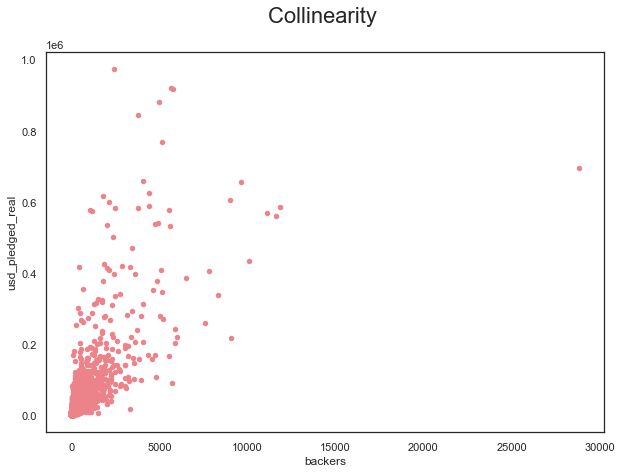

In [38]:
#Check colinearity:
dataset2[['backers', 'usd_pledged_real']].plot.scatter( figsize = (10, 7), 
                                                          x ='backers', y='usd_pledged_real',color =  '#ec838a')
plt.title('Collinearity \n', horizontalalignment="center", 
          fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

### Step 11.5: Remove unuseful columns based on correlation/collinearity analysis

Removing one or more correlated variables may reduce the multicollinearity between correlated features.

In [39]:
#Applying changes in the main dataset: - Remove columns with high colunearity or unnecessary columns
col_to_drop = ['usd_pledged_real']
dataset = dataset.drop(columns = col_to_drop)
print("The following columns were removed",col_to_drop)

The following columns were removed ['usd_pledged_real']


### Step 11.6: Check colinearity again if necessary

In [40]:
#Recheck Colinearity:
dataset2 = dataset[[ 'backers', 'usd_goal_real','pledge_rate']]
calc_vif(dataset2)

,variables,VIF
0,backers,1.007301
1,usd_goal_real,1.006989
2,pledge_rate,1.000311


### Step 12: Check variable and feature engineering

In [41]:
# Check variables and make new columns if necessary


### Step 13: Label Encode Binary data: 
Use Label Encoding for any categorical variable with two or less unique values.

In [42]:
#Create a label encoder object
le = LabelEncoder()
col_list=[]
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            col_list.append(col)
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))
print('List of columns label encoded: ',  col_list)

0 columns were label encoded.
List of columns label encoded:  []


### Step 14: Encode Categorical data: 
For categorical variable with more than two unique values, use get_dummies method.

In [43]:
#Incase if user_id is an object:
identity = dataset["ID"]
dataset = dataset.drop(columns=['ID'])

#Convert rest of categorical variable into dummy:
dataset= pd.get_dummies(dataset)

#Rejoin userid to dataset:
dataset = pd.concat([dataset, identity], axis = 1)

In [44]:
dataset.head()

,state,backers,usd_goal_real,duration,pledge_rate,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,...,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,ID
0,0,0,1533.95,58.0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000002330
1,0,15,30000.00,59.0,0.080700,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1000003930
2,0,3,45000.00,44.0,0.004889,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1000004038
3,0,1,5000.00,29.0,0.000200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1000007540
4,0,14,19500.00,55.0,0.065795,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1000011046


### Step 15: Conduct Feature Scaling: 
Apply feature scaling for numerical variables.

In [45]:
scl_cols = ['backers','pledge_rate','duration','usd_goal_real']

sc_X = StandardScaler()
dataset[scl_cols] = pd.DataFrame(sc_X.fit_transform(dataset[scl_cols]))

print('The following columns were scaled',scl_cols)

The following columns were scaled ['backers', 'pledge_rate', 'duration', 'usd_goal_real']


In [46]:
# Remove missing values
dataset=dataset.dropna()

### Step 16: Split the dataset into dependent and independent variables: 
Now we need to separate the dataset into X and y values. y would be the ‘Churn’ column whilst X would be the remaining list of independent variables in the dataset.

In [47]:
#Identify response variable:
response = dataset["state"]
dataset = dataset.drop(columns="state")

In [48]:
dataset.isnull().sum()

backers                 0
usd_goal_real           0
duration                0
pledge_rate             0
category_3D Printing    0
                       ..
country_NZ              0
country_SE              0
country_SG              0
country_US              0
ID                      0
Length: 200, dtype: int64

### Step 17: Split dataset into training and test sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset, response, test_size = 0.2, random_state = 42)

#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (15676, 200)
Number transactions y_train dataset:  (15676,)
Number transactions X_test dataset:  (3920, 200)
Number transactions y_test dataset:  (3920,)


### Step 18: Remove ID Columns

In [50]:
col_id = 'ID'
train_identity = X_train[col_id]
X_train = X_train.drop(columns = [col_id])
test_identity = X_test[col_id]
X_test = X_test.drop(columns = [col_id])

### Step 19: Apply Imbalance Correction if needed

In [51]:
Apply_Imbalanced_Correction = False

if Apply_Imbalanced_Correction: 
    from imblearn.over_sampling import SMOTE
    over = SMOTE(sampling_strategy = 'auto', random_state = 42)
    X_train, y_train = over.fit_resample(X_train, y_train)
    after_sm = y_train.value_counts()
    print(after_sm)
    X_train.head()
    print('Imbalance Correction was applied')
else:
    print('Imbalance Correction was not applied')    


Imbalance Correction was not applied


## Section C: Model Selection

### Step 20: Compare Baseline Classification Algorithms: 
Apply multiple classification models on the training dataset and evaluate their accuracy.

In [52]:
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

In [53]:
models = []
models.append(('Logistic Regression, LR', LogisticRegression(solver='liblinear', 
                                                         random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier,DT',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest,RF', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(('Gradient Boosting Classifier, GBC', GradientBoostingClassifier(random_state = 0)))
models.append(('XGB Classifier, XGB',XGBClassifier(random_state = 0,use_label_encoder=False)))
models.append(('LGBM Classifier, LGBMC',LGBMClassifier(random_state = 0)))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD','Accuracy Mean', 'Accuracy STD']

# Create a DataFrame of performance results
model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)

    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

[01:17:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:17:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:17:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,"Logistic Regression, LR",67.72,1.30,62.40,1.09
7,"Gradient Boosting Classifier, GBC",66.45,0.98,66.00,0.50
9,"LGBM Classifier, LGBMC",66.32,1.14,66.36,0.52
8,"XGB Classifier, XGB",65.14,0.96,65.83,0.84
1,SVC,64.21,0.69,67.37,0.72
2,Kernel SVM,64.15,1.19,66.99,0.85
6,"Random Forest,RF",62.57,1.24,63.99,0.84
3,KNN,60.38,1.34,62.55,0.79
4,Gaussian NB,60.09,1.85,47.41,0.85
5,"Decision Tree Classifier,DT",54.24,1.32,58.01,1.21


### Step 21: Selection of the best models for further analysis 
Based on the initial evaluation, select a few models with good scores to perform additional analysis with grid searh approach.

In [54]:
all_models = ['lr','svc','dt','rf','gbc','xgb','lgbmc','ensemble']
selected_models={ 'lr':1, 'svc':0,    'dt':0,      'rf':0,
                 'gbc':0, 'xgb':1, 'lgbmc':1,'ensemble':0}

random_state=0
scoring_metric = 'accuracy'
comparison_dict = {}
comparison_test_dict = {}

def plot_conf_mx(cm, classifier_name, ax):
    sns.heatmap(cm, annot = True, cmap = 'Blues', annot_kws = {'fontsize': 24}, ax = ax)
    ax.set_title('{}'.format(classifier_name))
    ax.set_xlabel('Predicted Label')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['Unsuccessful', 'Successful'])
    ax.set_ylabel('True Label') 
    ax.set_yticks([0.25, 1.25])
    ax.set_yticklabels(['Unsuccessful', 'Successful']);

def clf_performance(classifier, classifier_name, classifier_name_abv):
    print('\n', classifier_name)
    print('-------------------------------')
    print('   Best Score ({}): '.format(scoring_metric) + str(np.round(classifier.best_score_, 3)))
    print('   Best Parameters: ')
    for key, value in classifier.best_params_.items() :
        print ('      {}: {}'.format(key, value))
    
    y_pred_pp = cross_val_predict(classifier.best_estimator_, X_train, y_train, cv = 5, method = 'predict_proba')[:, 1]
    y_pred = y_pred_pp.round()
    
    cm = confusion_matrix(y_train, y_pred, normalize = 'true')
    
    fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
    
    comparison_dict[classifier_name_abv] = [accuracy_score(y_train, y_pred), 
                                            precision_score(y_train, y_pred),
                                            recall_score(y_train, y_pred),
                                            roc_auc_score(y_train, y_pred_pp),
                                            fpr, tpr]    


### Step 21.1: Logistic Regression

In [55]:
if selected_models['lr']:
    lr = LogisticRegression(random_state = random_state)
    param_grid = {'max_iter' : [100], 'penalty' : ['l1', 'l2'],'C' : [0.001, 0.01, 0.1, 1, 10],
                  'solver' : ['lbfgs', 'liblinear']}
    clf_lr = GridSearchCV(lr, param_grid = param_grid, scoring = scoring_metric, cv = 5, verbose = False, n_jobs = -1)
    best_clf_lr = clf_lr.fit(X_train, y_train)
    clf_performance(best_clf_lr, 'Logistic Regression', 'LR')

/Users/mehmetcil/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.6428298  0.64257462 0.64244703        nan 0.6428298
 0.65246271 0.65265408        nan 0.66477442 0.67185535 0.67166396
        nan 0.67357729 0.67293937 0.67293937        nan 0.6731308
 0.67300325 0.67293939]
  warnings.warn(



 Logistic Regression
-------------------------------
   Best Score (accuracy): 0.674
   Best Parameters: 
      C: 1
      max_iter: 100
      penalty: l1
      solver: liblinear


### Step 21.2: Support Vector Classifier

In [56]:
if selected_models['svc']:
    svc = SVC(probability = True, random_state = random_state)
    param_grid = [{'kernel': ['rbf'],
                   'gamma': ['scale', 'auto'],
                   'C': [.1, 1, 2]},
                  {'kernel': ['linear'], 
                   'C': [.1, 1, 10]}]

    clf_svc = GridSearchCV(svc, param_grid = param_grid, scoring = scoring_metric, cv = 5, verbose = False, n_jobs = -1)
    best_clf_svc = clf_svc.fit(X_train, y_train)
    clf_performance(best_clf_svc, 'Support Vector Classifier', 'SVC')

### Step 21.3: Decision Tree

In [57]:
if selected_models['dt']:
    dt = DecisionTreeClassifier(random_state = random_state)
    param_grid = {'criterion': ['entropy', 'gini'],
                  'max_depth': [2,6,10],
                  'min_samples_leaf': [2, 3, 5],
                  'min_samples_split': [2, 3, 5, 7]}

    clf_dt = GridSearchCV(rf, param_grid = param_grid, scoring = scoring_metric, cv = 5, verbose = False, n_jobs = -1)
    best_clf_dt = clf_dt.fit(X_train, y_train)
    clf_performance(best_clf_dt, 'Decision Tree Classifier', 'DT')

### Step 21.4: Random Forest

In [58]:
if selected_models['rf']:
    rf = RandomForestClassifier(random_state = random_state)
    param_grid = {'n_estimators': [50],
                  'criterion': ['entropy', 'gini'],
                  'bootstrap': [True],
                  'max_depth': [6],
                  'max_features': ['auto','sqrt'],
                  'min_samples_leaf': [2, 3, 5],
                  'min_samples_split': [2, 3, 5]}

    clf_rf = GridSearchCV(rf, param_grid = param_grid, scoring = scoring_metric, cv = 5, verbose = False, n_jobs = -1)
    best_clf_rf = clf_rf.fit(X_train, y_train)
    clf_performance(best_clf_rf, 'Random Forest Classifier', 'RF')

### Step 21.5: Gradient Boosting Classifier

In [59]:
if selected_models['gbc']:
    gbc = GradientBoostingClassifier(random_state = random_state)
    param_grid = {'n_estimators': [600],
                  'subsample': [0.66, 0.75],
                  'learning_rate': [0.001, 0.01],
                  'max_depth': [3],                       # default=3
                  'min_samples_split': [5, 7],
                  'min_samples_leaf': [3, 5],
                  'max_features': ['auto', 'log2', None],
                  'n_iter_no_change': [20],
                  'validation_fraction': [0.2],
                  'tol': [0.01]}

    clf_gbc = GridSearchCV(gbc, param_grid = param_grid, scoring = scoring_metric, cv = 5, verbose = False, n_jobs = -1)
    best_clf_gbc = clf_gbc.fit(X_train, y_train)
    clf_performance(best_clf_gbc, 'Gradient Boosting Classifier', 'GBC')

### Step 21.6: XGBoost Classifier

In [74]:
if selected_models['xgb']:
    xgb = XGBClassifier(random_state = random_state)

    param_grid = {'n_estimators': [50],
                  'learning_rate': [0.001, 0.01],
                  'max_depth': [3, 4],                # default=6
                  'reg_alpha': [1, 2],
                  'reg_lambda': [1, 2],
                  'subsample': [0.5, 0.75],
                  'colsample_bytree': [0.50, 0.75],
                  'gamma': [0.1, 0.5, 1],
                  'min_child_weight': [1]}

    clf_xgb = GridSearchCV(xgb, param_grid = param_grid, scoring = scoring_metric, cv = 5, verbose = False, n_jobs = -1)
    best_clf_xgb = clf_xgb.fit(X_train, y_train)
    clf_performance(best_clf_xgb, 'XGBoost Classifier', 'XGBC')

/Users/mehmetcil/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:41:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 XGBoost Classifier
-------------------------------
   Best Score (accuracy): 0.658
   Best Parameters: 
      colsample_bytree: 0.75
      gamma: 0.1
      learning_rate: 0.001
      max_depth: 4
      min_child_weight: 1
      n_estimators: 50
      reg_alpha: 2
      reg_lambda: 2
      subsample: 0.5
[07:41:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like 

/Users/mehmetcil/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mehmetcil/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:41:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mehmetcil/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:41:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mehmetcil/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:41:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mehmetcil/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:41:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Step 21.7: LGBMC Classifier

In [75]:
if selected_models['lgbmc']:
    lgbmc = LGBMClassifier(random_state = random_state)

    param_grid = {'max_depth': [5],
                  'num_leaves': [5, 10],
                  'learning_rate': [0.001, 0.01],
                  'n_estimators': [200],
                  'feature_fraction': [0.5],
                  'min_child_samples': [5, 10],
                  'reg_alpha': [0.1, 0.5],
                  'reg_lambda': [0.1, 0.5]} 

    clf_lgbmc = GridSearchCV(lgbmc, param_grid = param_grid, verbose = False,
                             scoring = scoring_metric, cv = 5, n_jobs = -1)

    best_clf_lgbmc = clf_lgbmc.fit(X_train, y_train)
    clf_performance(best_clf_lgbmc, 'LGBMClassifier', 'LGBMC')

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5

 LGBMClassifier
-------------------------------
   Best Score (accuracy): 0.653
   Best Parameters: 
      feature_fraction: 0.5
      learning_rate: 0.01
      max_depth: 5
      min_child_samples: 5
      n_estimators: 200
      num_leaves: 10
      reg_alpha: 0.5
      reg_lambda: 0.1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


### Step 21.8: Ensemble Learning

In [76]:
estimators=[]
feature_list=[]
for models in selected_models:
    if selected_models[models]:
        if models == 'lr':
            estimators.append(('LR',best_clf_lr.best_estimator_))
        elif models == 'svc':
            estimators.append(('SCV', best_clf_svc.best_estimator_))
        elif models == 'dt':
            estimators.append(('DT', best_clf_dt.best_estimator_))
        elif models == 'rf':
            estimators.append(('RF', best_clf_rf.best_estimator_))
            feature_list.append(('RF', best_clf_rf))
        elif models == 'gbc':
            estimators.append(('GBC', best_clf_gbc.best_estimator_))
            feature_list.append(('GBC', best_clf_gbc))
        elif models == 'xgb':
            estimators.append(('XGB', best_clf_xgb.best_estimator_))
            feature_list.append(('XGB', best_clf_xgb))
        elif models == 'lgbmc': 
            estimators.append(('LGBMC', best_clf_lgbmc.best_estimator_))
            feature_list.append(('LGBMC', best_clf_lgbmc))

if selected_models['ensemble']:
    
    tuned_voting_soft = VotingClassifier(estimators = estimators[1:], voting = 'soft', n_jobs = -1)
    estimators.append(('SoftV', tuned_voting_soft))

    y_pred_pp = cross_val_predict(tuned_voting_soft, X_train, y_train, cv = 5, method = 'predict_proba')[:, 1]
    y_pred = y_pred_pp.round()

    cm = confusion_matrix(y_train, y_pred, normalize = 'true')
    fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
    comparison_dict['SVot'] = [accuracy_score(y_train, y_pred),
                               precision_score(y_train, y_pred),
                               recall_score(y_train, y_pred),
                               roc_auc_score(y_train, y_pred_pp), fpr, tpr]

    print('Soft Voting\n-----------------')
    print('  Recall: ', np.round(recall_score(y_train, y_pred), 3))

    fig, ax = plt.subplots(figsize = (5, 4))

    plot_conf_mx(cm, 'Soft Voting', ax)    
    plt.tight_layout();

# Section D: Model Evaluation

### Step 22: Learning Curves

In [77]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, estimator_name, X, y, cv = None, train_sizes = np.linspace(0.1, 1.0, 5)):
                 
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = -1, 
                                                            train_sizes = train_sizes, scoring = 'accuracy')
    
    train_scores_mean, train_scores_std = np.mean(train_scores, axis = 1), np.std(train_scores, axis = 1)
    test_scores_mean, test_scores_std = np.mean(test_scores, axis = 1), np.std(test_scores, axis = 1)
            
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = 'dodgerblue')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = 'darkorange')
    
    plt.plot(train_sizes, train_scores_mean, color = 'dodgerblue', marker = 'o', linestyle = '-', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, color = 'darkorange', marker = 'o', linestyle = '-', label = 'Cross-validation Score')
    plt.title(estimator_name)
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy Score')
    plt.legend(loc = 'best')
            
    plt.tight_layout();

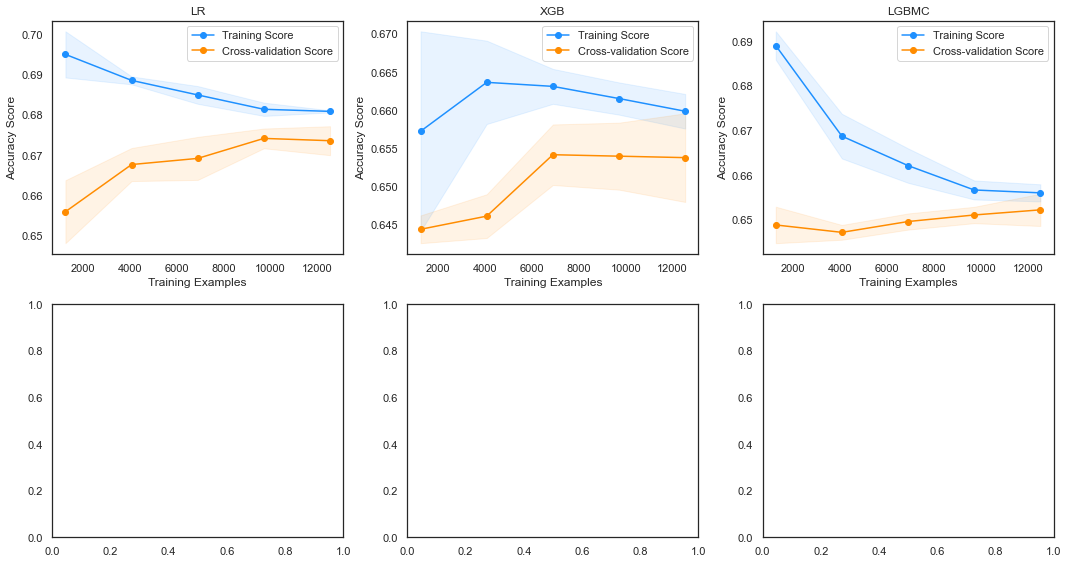

In [78]:
rownum=int(len(estimators)/3)+1
fig, ax = plt.subplots(rownum, 3, figsize = (15, 4*rownum))

for i in range(len(estimators)):
    plt.subplot(rownum, 3, i + 1)
    plot_learning_curve(estimators[i][1], estimators[i][0], X_train, y_train)
    
plt.tight_layout()


### Step 23: Feature Importance

In [79]:
def plot_feature_imp(classifier, classifier_name, color, ax):

    importances = pd.DataFrame({'Feature': X_train.columns,
                                'Importance': np.round(classifier.best_estimator_.feature_importances_, 3)})

    importances = importances.sort_values('Importance', ascending = True).set_index('Feature')
    importances[-20:].plot.barh(color = color, edgecolor = 'firebrick', legend = False, ax = ax)
    ax.set_title(classifier_name)
    ax.set_xlabel('Importance');

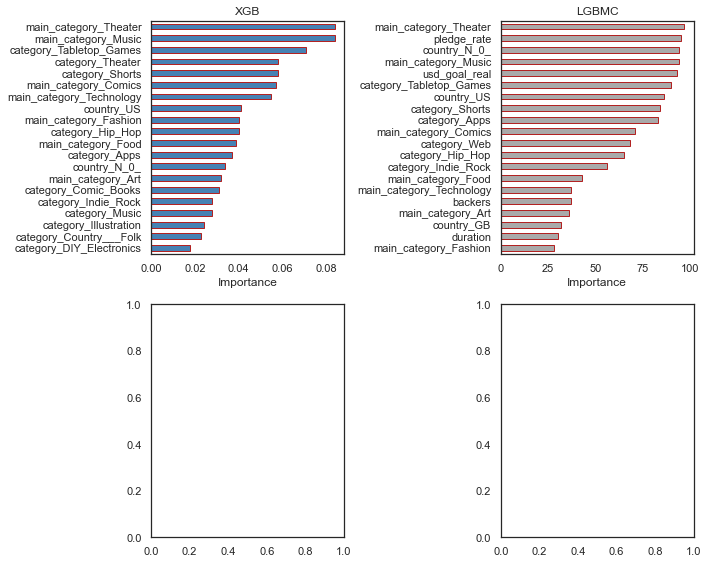

In [80]:
color_ = ['steelblue', 'darkgray', 'cadetblue', 'bisque']

fig = plt.subplots(2, 2, figsize = (10, 8))

for i in range(len(feature_list)): 
    name = feature_list[i][0]
    clf = feature_list[i][1]
    ax = plt.subplot(2, 2, i + 1)
    plot_feature_imp(clf, name, color_[i], ax)
    plt.ylabel('')
    
plt.tight_layout();

### Step 24: Visualize Performance Comparison of Selected Models

In [81]:
comparison_matrix = {}
for key, value in comparison_dict.items():
    comparison_matrix[str(key)] = value[0:4]

comparison_df = pd.DataFrame(comparison_matrix, index = ['Accuracy', 'Precision', 'Recall', 'AUC']).T
comparison_df.style.highlight_max(color = 'indianred', axis = 0)

,Accuracy,Precision,Recall,AUC
LR,0.673577,0.565703,0.370602,0.675054
XGBC,0.657693,0.601393,0.123415,0.639914
LGBMC,0.652526,0.627090,0.066976,0.660552


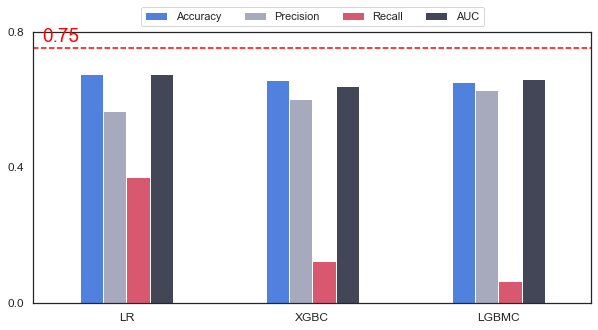

In [82]:
label_size=17

comparison_df.plot(kind = 'bar', figsize = (10, 5), fontsize = 12, 
                   color = ['#5081DE', '#A7AABD', '#D85870', '#424656'])

plt.legend(loc = 'upper center', ncol = len(comparison_df.columns), bbox_to_anchor = (0.5, 1.11))
plt.xticks(rotation = 0)
plt.yticks([0, 0.4, 0.8])

plt.axhline(y = 0.75, color = 'red', linestyle = '--')
plt.text(x = -0.45, y = 0.77, s = '0.75', size = label_size + 2, color = 'red');

### Step 25: Evaluate the model using ROC Graph: 

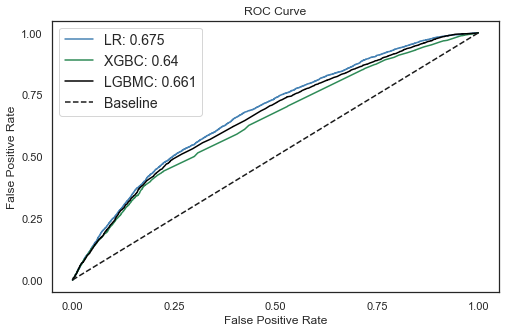

In [83]:
colors = ['steelblue', 'seagreen', 'black', 'darkorange', 'purple', 'firebrick', 'slategrey','red']

fig = plt.figure(figsize = (8, 5))

for index, key in enumerate(comparison_dict.keys()):
    auc, fpr, tpr = comparison_dict[key][3], comparison_dict[key][4], comparison_dict[key][5]
    plt.plot(fpr, tpr, color = colors[index], label = '{}: {}'.format(key, np.round(auc, 3)))

plt.plot([0, 1], [0, 1], 'k--', label = 'Baseline')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xticks([0, 0.25, 0.5, 0.75, 1])
plt.ylabel('False Positive Rate')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.legend(fontsize = 14);

# Section F: Test Data Predictions


### Step 26: Compare predictions against the test set:

In [84]:
def test_func(classifier, classifier_name):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, normalize = 'true')
    
    comparison_test_dict[classifier_name] = [accuracy_score(y_test, y_pred), 
                                             precision_score(y_test, y_pred),
                                             recall_score(y_test, y_pred)]
    
    plt.title(classifier_name)
    sns.heatmap(cm, annot = True, annot_kws = {'fontsize': 18}, cmap = 'Blues')
    plt.xlabel('Predicted Label')
    plt.xticks([0.5, 1.5], ['Unsuccessful', 'Successful'])
    plt.ylabel('True Label') 
    plt.yticks([0.2, 1.4], ['Unsuccessful', 'Successful']);

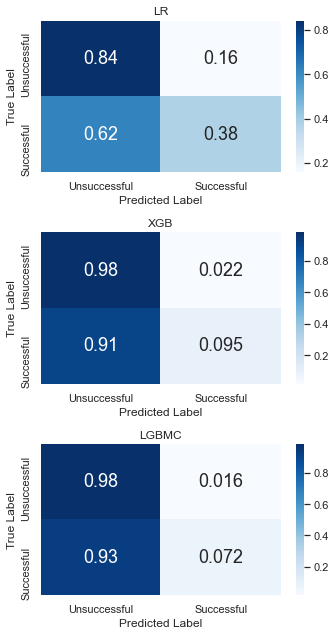

In [85]:
if selected_models['ensemble']:
    tuned_voting_soft.fit(X_train, y_train)
    
fig = plt.subplots(len(estimators), 1, figsize = (5, len(estimators)*3))
for i in range(len(estimators)):
    plt.subplot(len(estimators), 1, i + 1)
    test_func(estimators[i][1], estimators[i][0])
plt.tight_layout();

### Step 27: Model performance on test dataset

In [86]:
comparison_test_df = pd.DataFrame(comparison_test_dict, index = ['Accuracy', 'Precision', 'Recall']).T
comparison_test_df.style.highlight_max(color = 'indianred', axis = 0)

,Accuracy,Precision,Recall
LR,0.671429,0.574332,0.376314
XGB,0.656378,0.710526,0.094604
LGBMC,0.651786,0.715278,0.072179


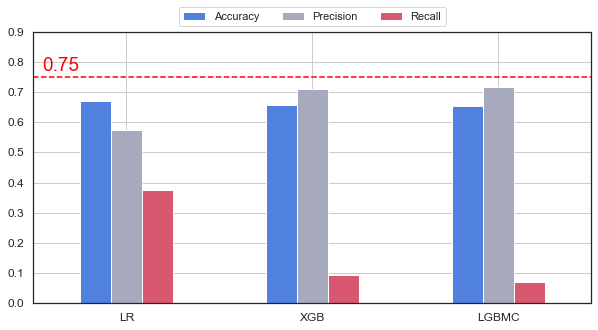

In [87]:
comparison_test_df.plot(kind = 'bar', figsize = (10, 5), fontsize = 12, grid='on',
                        color = ['#5081DE', '#A7AABD', '#D85870'])

plt.legend(loc = 'upper center', ncol = len(comparison_test_df.columns), bbox_to_anchor = (0.5, 1.11))
plt.xticks(rotation = 0)
plt.yticks(list(np.arange(0.0,1.0,0.1)))

plt.axhline(y = 0.75, color = 'red', linestyle = '--')
plt.text(x = -0.45, y = 0.77, s = '0.75', size = label_size + 2, color = 'red');

### References:

1. [Predicting Customer Churn using Machine Learning](https://www.kaggle.com/korfanakis/predicting-customer-churn-using-machine-learning?scriptVersionId=49903138&cellId=111), by Orfanakis Konstantinos
2. [Predict Customer Churn in Python](https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7), by Sree